# Objective

#### performing k-means clustring on amazon fine food review

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, neighbors
import nltk
import string
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
filtered_data = pd.read_csv('./Reviews.csv')

In [3]:
filtered_data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
filtered_data.dropna(inplace=True)
filtered_data[filtered_data['Score'] != 3]
filtered_data['Score'] = np.where(filtered_data['Score'] > 3, 1, 0)
 

In [5]:
#Deduplication of data
final=filtered_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
 

In [6]:
#Helpfulness numerator is always less than or equal to the helpfulness denominator so we have to remove it
final=final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]
 

In [7]:
new_data=final.sample(n=10000)

In [8]:
final=new_data.sort_values('Time', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

# TEXT PREPROCESSING

In [9]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

stop = set(stopwords.words('english')) #set of stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned
print(stop)
print('************************************')
print(sno.stem('tasty'))

{'hasn', "isn't", 'myself', 'from', 'the', 'while', 'against', 'few', 'out', 'won', 'when', 'had', 'your', 'if', "she's", 'shouldn', 'herself', 'y', 'did', 'any', 're', "didn't", 'now', 'on', 'nor', 'been', 'himself', 'its', 'aren', 'm', 'just', "shan't", 'are', 'a', 'i', 'can', 'why', "weren't", 'those', 'will', 'through', 'which', 'off', 'there', 'but', 'further', 'hers', "hadn't", 'yourself', 'by', 'here', "should've", 'after', 'am', "don't", 've', 'do', 'yours', "shouldn't", 'each', 'mustn', 'has', 'ourselves', 'too', "doesn't", 'wasn', 'between', 'most', 'needn', 'he', 'be', 'very', 'no', 'having', 'own', 'haven', 's', 'hadn', 'again', 'being', 'what', "it's", 'mightn', 'an', 'ain', 'where', 'were', "hasn't", 'with', 'in', 'our', 'these', 'until', 'before', 'below', 'once', 'both', 'should', "you've", "you're", 'ours', 'other', 'at', "you'd", 'of', 'they', "won't", 'to', 'or', 'weren', 'over', 'same', 'you', 'my', "haven't", 'as', 'under', 'their', "mustn't", 'up', 'she', "that'll

In [10]:
i=0
str1=' '
final_string=[]
all_positive_words=[] # store words from +ve reviews here
all_negative_words=[] # store words from -ve reviews here.
s=''
for sent in final['Text'].values:
    filtered_sentence=[]
    #print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (final['Score'].values)[i] == 'positive': 
                        all_positive_words.append(s) #list of all words used to describe positive reviews
                    if(final['Score'].values)[i] == 'negative':
                        all_negative_words.append(s) #list of all words used to describe negative reviews reviews
                else:
                    continue
            else:
                continue 
    #print(filtered_sentence)
    str1 = b" ".join(filtered_sentence) #final string of cleaned words
    #print("***********************************************************************")
    
    final_string.append(str1)
    i+=1

In [11]:
final['CleanedText']=final_string

In [12]:
final=final.reset_index(drop=True)
 

In [29]:
final_train=final['CleanedText']
 
    
    

# K-means BAG OF WORDS

In [14]:
count_vect = CountVectorizer() 
final_x = count_vect.fit_transform(final_train).toarray()

In [15]:
from sklearn.preprocessing import StandardScaler
scaler_bow=StandardScaler(with_mean=False)
bow_scaled=scaler_bow.fit_transform(final_x )

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [16]:
wcss=[]
from sklearn.cluster import KMeans
for i in range(1, 20):
    
        
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state = 42)
    kmeans.fit(bow_scaled)
    wcss.append(kmeans.inertia_)

Text(0,0.5,'Error Rate')

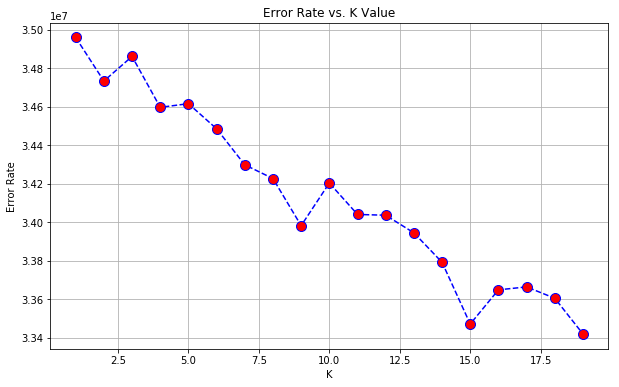

In [17]:

k=list(range(1,20))
plt.figure(figsize=(10,6))
plt.plot(k,wcss,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.grid()
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### The best K observed is 15

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 15, init = 'k-means++',random_state = 42)
kmeans.fit(bow_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=15, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [20]:
for i in range(15):
    print("Cluster #{}\n".format(i))
    reviews_in_this_cluster = final['Text'][np.where(kmeans.labels_==i)[0]]
    for review in reviews_in_this_cluster[:10]:
        print(review + "\n")

Cluster #0

The crunchy chocolate squares in this box were a real surprise and I love how delicate the crunch is when encased in a burst of delicious chocolate.<br /><br />You may also enjoy the Mint chocolates. They are delicious after dinner or anytime you want to wake up your taste buds. The mint flavor bursts from these chocolates as if it was encased in little sugar crystals. It is quite perfect and refreshing.<br /><br />I also love the Cinnamon and Orange. If you have been dreaming of the most delicious orange flavored chocolates in the world, you have to try the Orange Napolitains. I love both equally, although the cinnamon flavor has me completely seduced.<br /><br />I prefer to savor each piece of chocolate with a cup of coffee, tea or hot chocolate. The warmth of the beverage creates an entirely different experience than if you were to simply taste a square of chocolate on its own.<br /><br />Once your mouth is warmed, take a small bite of the chocolate square and enter Mint

 ### observation
 ### cluster 0 belongs to chocklet products
 ### cluster 2 belongs to cat foods
 ### cluster 3 belongs tocoffee products
 ### cluster 4 belongs to green tea
 ### cluster 7 belongs to senseo machines
 ### cluster 8 belongs to dog foods
 ### cluster 10 belongs to tea products
 ### cluster 13 belongs to soup products
  


# k-means with tf-idf 

In [31]:
tf_idf_vect = TfidfVectorizer()# It will create unigram as well as bigram
final_tf_idf = tf_idf_vect.fit_transform(final_train)


In [32]:
scaler_tf=StandardScaler(with_mean=False)
scaled=scaler_tf.fit_transform(final_tf_idf)

In [35]:
 wcss=[]
from sklearn.cluster import KMeans
for i in range(1, 20):
    
        
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state = 42)
    kmeans.fit(scaled)
    wcss.append(kmeans.inertia_)

Text(0,0.5,'Error Rate')

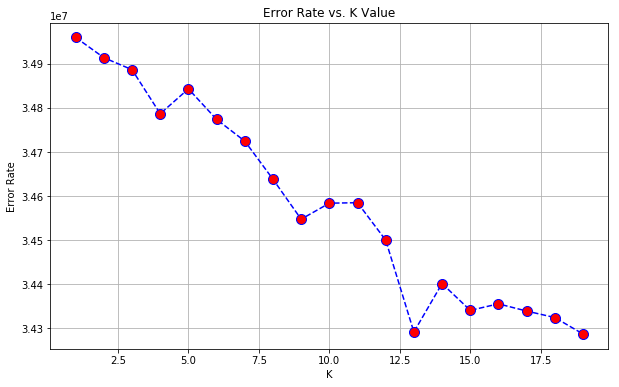

In [36]:
k=list(range(1,20))
plt.figure(figsize=(10,6))
plt.plot(k,wcss,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.grid()
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### the best k is 13

In [37]:
kmeans = KMeans(n_clusters = 13, init = 'k-means++',random_state = 42)
kmeans.fit(scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=13, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [38]:
for i in range(13):
    print("Cluster #{}\n".format(i))
    reviews_in_this_cluster = final['Text'][np.where(kmeans.labels_==i)[0]]
    for review in reviews_in_this_cluster[:10]:
        print(review + "\n")

Cluster #0

This brand is properly cut across the grain, so it's fairly easy to eat, and the flavor is distributed through the cuts, rather than sprayed on. It made a pretty good stew meat after long cooking as well, though it had to be broken into small pieces to rehydrate.

I'd love to know the kind of bars the first reviewer eats; because they must be some amazing bars! My entire office loves the Nugo bars. They are actually made a few doors down the street from my office. I think the coffee bars, chocolate blast, and banana bars are the best. Peanutbutter pleasers are good as well. I recommend them. I've had many of the regular store bought brands and find these to be more chocolaty and delicious. Good luck!

One of my guilty pleasures.  I've had baklava from many places and of many types.  I'm less enthused about those made with rose or orange flavored sugar water, and love that made with honey.  These are a spiced honey and walnut combination.  For those who prefer pistachios, ho

 ### observation
 ### cluster 1: dog foods
 ### cluster 2: pet foods
 ### cluster 9: apple prodcuts
 ### cluster 10: chocklet products
 ### cluster 12:moisturizer products
 ### cluster 11: dog foods

 # k-means with avg-Word2Vec

In [43]:
 import gensim
i=0
list_of_sent=[]
for sent in final['Text'].values:
    filtered_sentence=[]
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    list_of_sent.append(filtered_sentence)
    

In [44]:
import gensim
w2v_model=gensim.models.Word2Vec(list_of_sent,min_count=5,size=50, workers=4) 

In [45]:
 sent_vectors = []
for sent in final['Text'].values: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


In [46]:
sent_vectors=pd.DataFrame(sent_vectors)
sent_vectors= sent_vectors.fillna(sent_vectors.median(axis=0))

In [47]:
from sklearn import preprocessing
sent_vectors=preprocessing.scale(sent_vectors,with_mean=False)

In [48]:
wcss=[]
from sklearn.cluster import KMeans
for i in range(1, 20):
    
        
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state = 42)
    kmeans.fit(sent_vectors)
    wcss.append(kmeans.inertia_)

Text(0,0.5,'Error Rate')

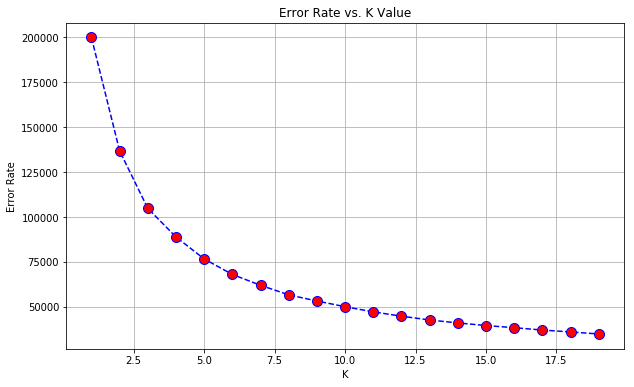

In [49]:
 k=list(range(1,20))
plt.figure(figsize=(10,6))
plt.plot(k,wcss,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.grid()
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### the best k is 8

In [52]:
 kmeans = KMeans(n_clusters = 8, init = 'k-means++',random_state = 42)
kmeans.fit(sent_vectors)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [53]:
   for i in range(8):
    print("Cluster #{}\n".format(i))
    reviews_in_this_cluster = final['Text'][np.where(kmeans.labels_==i)[0]]
    for review in reviews_in_this_cluster[:10]:
        print(review + "\n")

Cluster #0

incredibly refreshing and a mystery in taste - little expensive but hey - why not?

I like this soup.  One of the problems with low fat or healthy is it frequently means an inferior or different taste to the regular, not so healthy stuff.  This soup doesn't suffer that particular problem.  If you like classic to eat, this is a nice substitute.

Not only does he love it but we never have a problem with separation anxiety when he sees his kong ball with the stuffin inside!

Disgusting.  This is not anything like pasta so do not be fooled.  It is tofu and it smells and tastes like tofu.  If you do not particularly enjoy tofu, do not buy this product.

Definitely a quick and easy entree. Authentic (according to my experience) Indian cuisine. But too spicey hot for my taste.

Based on the mostly positive reviews, I purchased it. Well, believe the negative reviews. The cheap (think dollar store) glass teapot WITHOUT strainer holds 18 ounces. Since I just received this yesterday, 

 ### observation
 ### cluster 0: soup products
 ### cluster 1: coffee bar
 ### cluster 2: sandwitch 
 ### cluster 4: chocklet products
 ### cluster 5:lemon products
 ### cluster 6: tea prodcut
 ### cluster 7: toffee products
 